In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Vikitha Reddy\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [4]:
df = pd.read_csv('data/diamonds.csv')

In [6]:
df.shape

(53940, 10)

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Rearranging Columns

In [12]:
df2 = df.iloc[:,[0,1,2,3,4,5,7,8,9,6]]

In [13]:
df2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [14]:
df2.shape

(53940, 10)

### Checking for Outliers

In [15]:
col_name = df2.select_dtypes(include=['int','float']).columns


for i in col_name:
  mean = df2[i].mean()
  med =  df2[i].median()
  print(f'Mean for {i} is {mean}')
  print(f'Median for {i} is {med}')

Mean for carat is 0.7979397478679852
Median for carat is 0.7
Mean for depth is 61.74940489432624
Median for depth is 61.8
Mean for table is 57.45718390804603
Median for table is 57.0
Mean for x is 5.731157211716609
Median for x is 5.7
Mean for y is 5.734525954764462
Median for y is 5.71
Mean for z is 3.5387337782723316
Median for z is 3.53
Mean for price is 3932.799721913237
Median for price is 2401.0


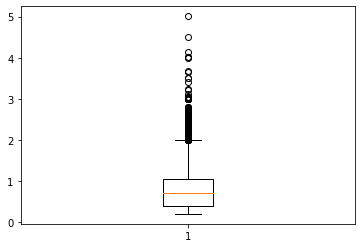

In [16]:
# before removing outliers
plt.boxplot(df2.carat)
plt.show()

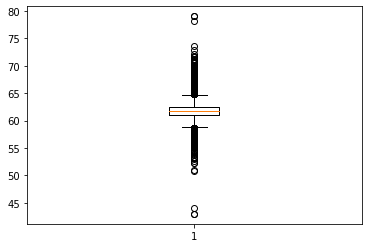

In [17]:
plt.boxplot(df2.depth)
plt.show()

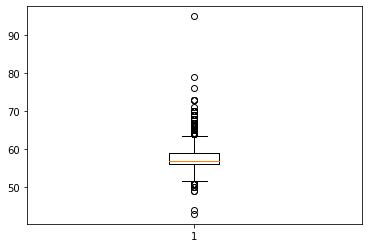

In [18]:
plt.boxplot(df2.table)
plt.show()

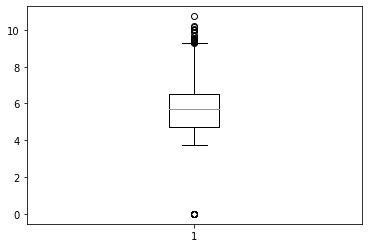

In [19]:
plt.boxplot(df2.x)
plt.show()

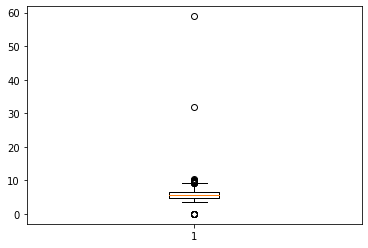

In [20]:
plt.boxplot(df2.y)
plt.show()

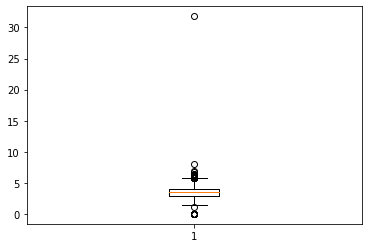

In [21]:
plt.boxplot(df2.z)
plt.show()

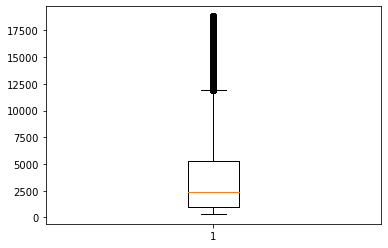

In [22]:
# after removing outliers
plt.boxplot(df2.price)
plt.show()

In [23]:
df2.shape

(53940, 10)

### Treating Outliers

In [24]:
def outliers(col_name):
  Q1 = np.percentile(df2[col_name], 25,
                   interpolation = 'midpoint')
 
  Q3 = np.percentile(df2[col_name], 75,
                   interpolation = 'midpoint')
  IQR = Q3 - Q1

  upper = Q3+(1.5*IQR)
  lower = Q1-(1.5*IQR)

  # df2.drop(upper[0], inplace = True)
  # df2.drop(lower[0], inplace = True)

  # df2.drop(df2[df2[col_name] == upper[0]].index, inplace = True)
  # df2.drop(df2[df2[col_name] == lower[0]].index, inplace = True)
  # df2.drop[(df2[col_name] > upper) & (df2[col_name] < lower)]
  # df2[col_name] = df2[(df2[col_name] < upper) & (df2[col_name] > lower)]
  df2.drop(df2[(df2[col_name] > upper) | (df2[col_name] < lower)].index, inplace=True)


In [25]:
outliers('carat')

<ipython-input-24-93031ba724fc>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df2[col_name], 25,
<ipython-input-24-93031ba724fc>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df2[col_name], 75,
<ipython-input-24-93031ba724fc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[(df2[col_name] > upper) | (df2[col_name] < lower)].index, in

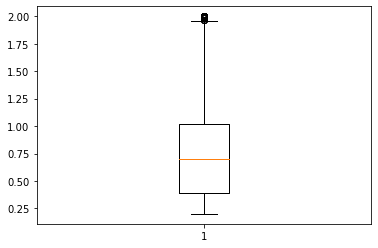

In [26]:
plt.boxplot(df2.carat)
plt.show()

In [27]:
df2.shape

(52051, 10)

In [28]:
outliers('depth')

<ipython-input-24-93031ba724fc>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df2[col_name], 25,
<ipython-input-24-93031ba724fc>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df2[col_name], 75,
<ipython-input-24-93031ba724fc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[(df2[col_name] > upper) | (df2[col_name] < lower)].index, in

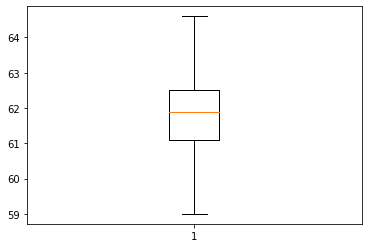

In [29]:
plt.boxplot(df2.depth)
plt.show()

In [30]:
outliers('table')

<ipython-input-24-93031ba724fc>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df2[col_name], 25,
<ipython-input-24-93031ba724fc>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df2[col_name], 75,
<ipython-input-24-93031ba724fc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[(df2[col_name] > upper) | (df2[col_name] < lower)].index, in

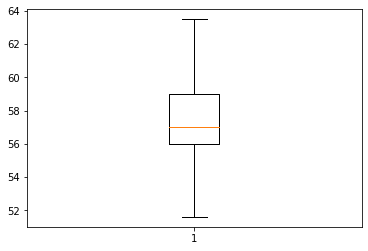

In [31]:
plt.boxplot(df2.table)
plt.show()

<ipython-input-24-93031ba724fc>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df2[col_name], 25,
<ipython-input-24-93031ba724fc>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df2[col_name], 75,
<ipython-input-24-93031ba724fc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[(df2[col_name] > upper) | (df2[col_name] < lower)].index, in

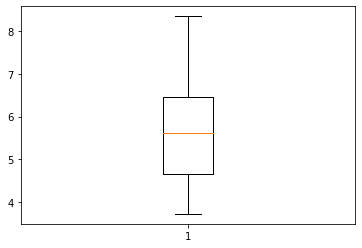

In [32]:
outliers('x')
plt.boxplot(df2.x)
plt.show()

<ipython-input-24-93031ba724fc>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df2[col_name], 25,
<ipython-input-24-93031ba724fc>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df2[col_name], 75,
<ipython-input-24-93031ba724fc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[(df2[col_name] > upper) | (df2[col_name] < lower)].index, in

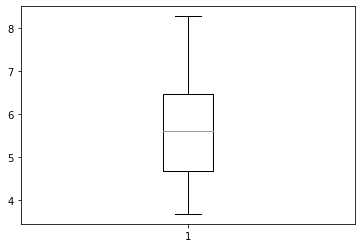

In [33]:
outliers('y')
plt.boxplot(df2.y)
plt.show()

<ipython-input-24-93031ba724fc>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df2[col_name], 25,
<ipython-input-24-93031ba724fc>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df2[col_name], 75,
<ipython-input-24-93031ba724fc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[(df2[col_name] > upper) | (df2[col_name] < lower)].index, in

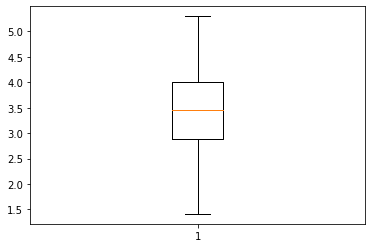

In [34]:
outliers('z')
plt.boxplot(df2.z)
plt.show()

<ipython-input-24-93031ba724fc>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df2[col_name], 25,
<ipython-input-24-93031ba724fc>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df2[col_name], 75,
<ipython-input-24-93031ba724fc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[(df2[col_name] > upper) | (df2[col_name] < lower)].index, in

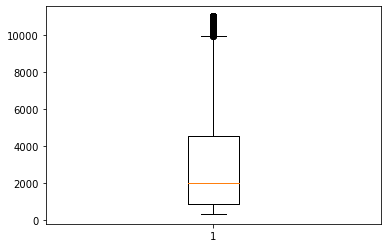

In [35]:
outliers('price')
plt.boxplot(df2.price)
plt.show()

In [36]:
df2.shape

(46530, 10)

In [37]:
df2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
5,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,336


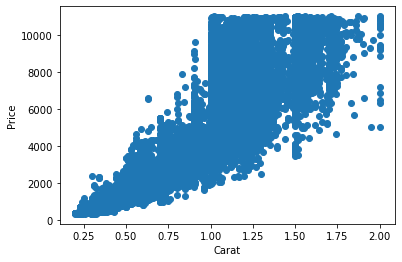

In [38]:
plt.scatter(df2['carat'],df2['price'])
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

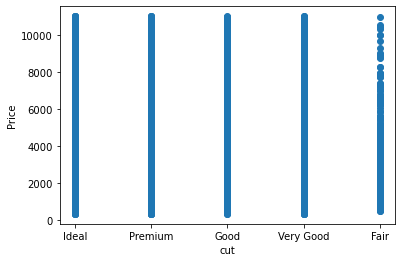

In [39]:
plt.scatter(df2['cut'],df2['price'])
plt.xlabel('cut')
plt.ylabel('Price')
plt.show()

<AxesSubplot:xlabel='carat', ylabel='Count'>

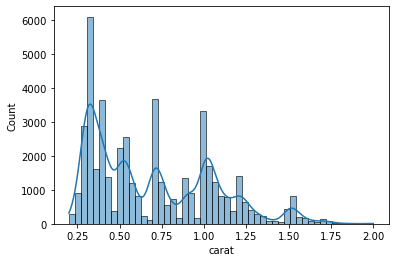

In [40]:
sns.histplot(data=df2['carat'],kde=True)

<AxesSubplot:xlabel='cut', ylabel='Count'>

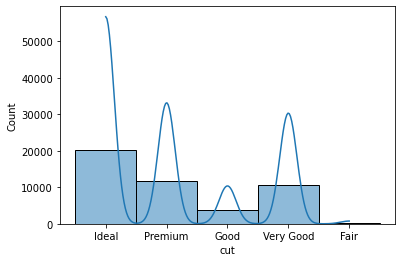

In [41]:
sns.histplot(data=df2['cut'],kde=True)

In [42]:
col_name

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

<AxesSubplot:xlabel='table', ylabel='Count'>

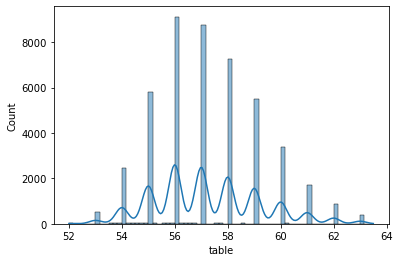

In [43]:
sns.histplot(data=df2['table'],kde=True)

<AxesSubplot:xlabel='x', ylabel='Count'>

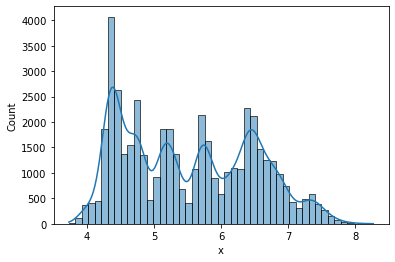

In [44]:
sns.histplot(data=df2['x'],kde=True)

<AxesSubplot:xlabel='y', ylabel='Count'>

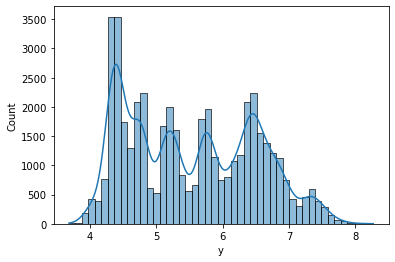

In [45]:
sns.histplot(data=df2['y'],kde=True)

<AxesSubplot:xlabel='z', ylabel='Count'>

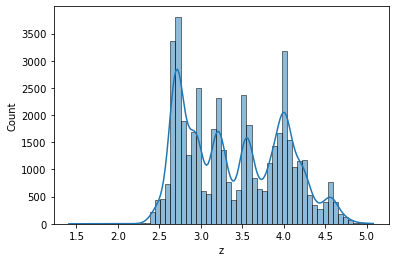

In [46]:
sns.histplot(data=df2['z'],kde=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

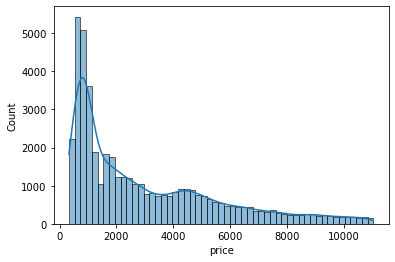

In [47]:
sns.histplot(data=df2['price'],kde=True)

<AxesSubplot:>

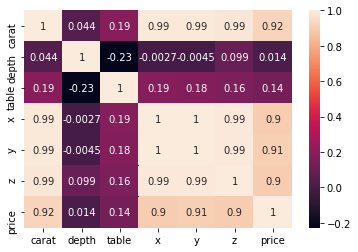

In [48]:
sns.heatmap(df2.iloc[:,:].corr(),annot=True)

We Can see Price column have strong corelation with carat,x,y and z columns.

In [49]:
df2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
5,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,336


In [50]:
df2.price.max()

11039

In [51]:
df2.describe()

,carat,depth,table,x,y,z,price
count,46530.000000,46530.000000,46530.000000,46530.000000,46530.000000,46530.000000,46530.000000
mean,0.697936,61.804300,57.238695,5.521271,5.526300,3.413812,2998.654481
std,0.362002,1.077364,2.013849,0.964439,0.958606,0.597191,2598.175430
min,0.200000,59.000000,52.000000,3.730000,3.680000,1.410000,326.000000
25%,0.370000,61.200000,56.000000,4.620000,4.630000,2.850000,880.000000
50%,0.590000,61.900000,57.000000,5.390000,5.400000,3.325000,2002.000000
75%,1.010000,62.500000,59.000000,6.390000,6.390000,3.960000,4522.000000
max,2.000000,64.600000,63.500000,8.270000,8.270000,5.080000,11039.000000


## Splitting Data into Train Test

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
df2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
5,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,336


In [54]:
X = df2.iloc[:,:9]

In [55]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [56]:
y = df2['price']

In [57]:
y

0         326
1         326
3         334
4         335
5         336
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 46530, dtype: int64

In [58]:
X.shape

(46530, 9)

In [59]:
y.shape

(46530,)

### Spliting Data

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [61]:
X_train.shape ,X_test.shape, y_train.shape, y_test.shape

((34897, 9), (11633, 9), (34897,), (11633,))

In [62]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,cut,color,clarity
30989,Premium,H,VVS2
3346,Ideal,G,IF
39456,Ideal,G,VS1
12153,Ideal,I,SI2
12381,Ideal,I,VVS2


### Ordinal Encoder for categorical features


In [63]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [64]:
X_train_catg = pd.DataFrame(enc.fit_transform(X_train_cat), 
                                    columns = X_train_cat.columns, 
                                    index = X_train_cat.index)
X_train_catg

,cut,color,clarity
30989,3.0,4.0,7.0
3346,2.0,3.0,1.0
39456,2.0,3.0,4.0
12153,2.0,5.0,3.0
12381,2.0,5.0,7.0
...,...,...,...
4931,1.0,4.0,2.0
22288,2.0,2.0,3.0
24389,4.0,1.0,3.0
14472,3.0,2.0,3.0


In [65]:
X_train_catg.isnull().sum()

cut        0
color      0
clarity    0
dtype: int64

In [66]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,carat,depth,table,x,y,z
30989,0.37,61.3,58.0,4.60,4.63,2.83
3346,0.62,60.3,57.0,5.54,5.61,3.35
39456,0.39,62.6,55.0,4.69,4.66,2.93
12153,1.23,62.1,56.0,6.84,6.88,4.26
12381,0.35,62.0,54.0,4.54,4.56,2.82


### Standard scaler for Numerical Columns

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_no = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

### Concantenating Dataframe/Columns

In [68]:
X_train_rescaled = pd.concat([X_train_catg,X_train_no], axis=1)

X_train_rescaled.head()

,cut,color,clarity,carat,depth,table,x,y,z
30989,3.0,4.0,7.0,-0.908569,-0.467035,0.380082,-0.958695,-0.938341,-0.980542
3346,2.0,3.0,1.0,-0.217191,-1.395498,-0.117531,0.017146,0.085254,-0.108961
39456,2.0,3.0,4.0,-0.853259,0.739966,-1.112758,-0.865263,-0.907006,-0.812930
12153,2.0,5.0,3.0,1.469770,0.275734,-0.615144,1.366714,1.411748,1.416306
12381,2.0,5.0,7.0,-0.963879,0.182888,-1.610371,-1.020983,-1.011455,-0.997303


### Preparing Test Data

In [69]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,cut,color,clarity
21356,Ideal,D,VS2
25042,Good,F,SI1
33795,Premium,F,VS2
9356,Ideal,G,SI2
28285,Ideal,J,SI2


In [70]:
X_test_catg = pd.DataFrame(enc.transform(X_test_cat), 
                                    columns = X_test_cat.columns, 
                                    index = X_test_cat.index)

In [71]:
X_test_catg.head()

,cut,color,clarity
21356,2.0,0.0,5.0
25042,1.0,2.0,2.0
33795,3.0,2.0,5.0
9356,2.0,3.0,3.0
28285,2.0,6.0,3.0


In [72]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,carat,depth,table,x,y,z
21356,1.02,61.5,56.0,6.46,6.49,3.99
25042,0.30,63.6,55.0,4.33,4.28,2.74
33795,0.40,60.7,60.0,4.75,4.80,2.90
9356,1.09,61.2,57.0,6.63,6.68,4.07
28285,0.33,62.4,54.0,4.43,4.45,2.77


In [73]:
X_test_no = pd.DataFrame(scaler.transform(X_test_num), 
                                    columns = X_test_num.columns, 
                                    index = X_test_num.index)

X_test_no.head()

,carat,depth,table,x,y,z
21356,0.889013,-0.281343,-0.615144,0.972225,1.004400,0.963754
25042,-1.102155,1.668428,-1.112758,-1.238990,-1.303910,-1.131393
33795,-0.825604,-1.024113,1.375309,-0.802976,-0.760778,-0.863214
9356,1.082599,-0.559882,-0.117531,1.148706,1.202852,1.097844
28285,-1.019190,0.554273,-1.610371,-1.135177,-1.126348,-1.081109


### Concatenating Test Dataframe

In [74]:
X_test_rescaled = pd.concat([X_test_catg,X_test_no], axis=1)

X_test_rescaled.head()

,cut,color,clarity,carat,depth,table,x,y,z
21356,2.0,0.0,5.0,0.889013,-0.281343,-0.615144,0.972225,1.004400,0.963754
25042,1.0,2.0,2.0,-1.102155,1.668428,-1.112758,-1.238990,-1.303910,-1.131393
33795,3.0,2.0,5.0,-0.825604,-1.024113,1.375309,-0.802976,-0.760778,-0.863214
9356,2.0,3.0,3.0,1.082599,-0.559882,-0.117531,1.148706,1.202852,1.097844
28285,2.0,6.0,3.0,-1.019190,0.554273,-1.610371,-1.135177,-1.126348,-1.081109


### Model Training

## Random Forest

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_rescaled, y_train)

RandomForestRegressor()

In [76]:
y_test_pred = rf_regressor.predict(X_test_rescaled)

In [77]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  189.74799419037794
Mean Squared Error:  119887.85333885881
Root Mean Squared Error:  346.2482539145271


## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train_rescaled, y_train)

DecisionTreeRegressor()

In [ ]:
y_test_pred = dt_regressor.predict(X_test_rescaled)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  256.70545001289435
Mean Squared Error:  228925.1670463337
Root Mean Squared Error:  478.4612492630241


## Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_regressor = GradientBoostingRegressor()
gbr_regressor.fit(X_train_rescaled, y_train)

GradientBoostingRegressor()

In [ ]:
y_test_pred = gbr_regressor.predict(X_test_rescaled)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  253.55002417862653
Mean Squared Error:  180297.13405666137
Root Mean Squared Error:  424.6141001623255


## Saving the model (Serialization)

In [78]:
from pickle import dump
dump(enc,open('models/ordinal_encoder.pkl','wb'))
dump(scaler, open('models/Standard_scaler.pkl', 'wb'))
dump(rf_regressor, open('models/rf_regressor.pkl', 'wb'))

Loading back model to check its working or not

In [79]:
from pickle import load


# Loading pretrained models from pickle file
enc=load(open('models/ordinal_encoder.pkl','rb'))
scaler = load(open('models/standard_scaler.pkl', 'rb'))
rf_regressor=load(open('models/rf_regressor.pkl','rb'))

In [82]:
print('enter diamond details')
cut=input()
color=input()
clarity=input()
carat=float(input())
depth=float(input())
table=float(input())
x = float(input())
y = float(input())
z = float(input())

enter diamond details


In [83]:
query_num = pd.DataFrame({'carat':[carat], 'depth':[depth],'table':[table],'x':[x],'y':[y],'z':[z]})
query_cat = pd.DataFrame({'cut':[cut], 'color':[color], 'clarity':[clarity]})   

In [84]:
query_cat = enc.transform(query_cat)

In [85]:
query_num = scaler.transform(query_num)

In [87]:
query_point = pd.concat([pd.DataFrame(query_num), pd.DataFrame(query_cat)], axis=1)
price = rf_regressor.predict(query_point)
        

c:\Users\Vikitha Reddy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
print(f"The price of Selected Diamond is $ {round(price[0],2)}")

The price of Selected Diamond is $ 2170.0
